#Mobile Price Prediction using Linear Regression


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/mobile_price.csv")

In [ ]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [ ]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
Price,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

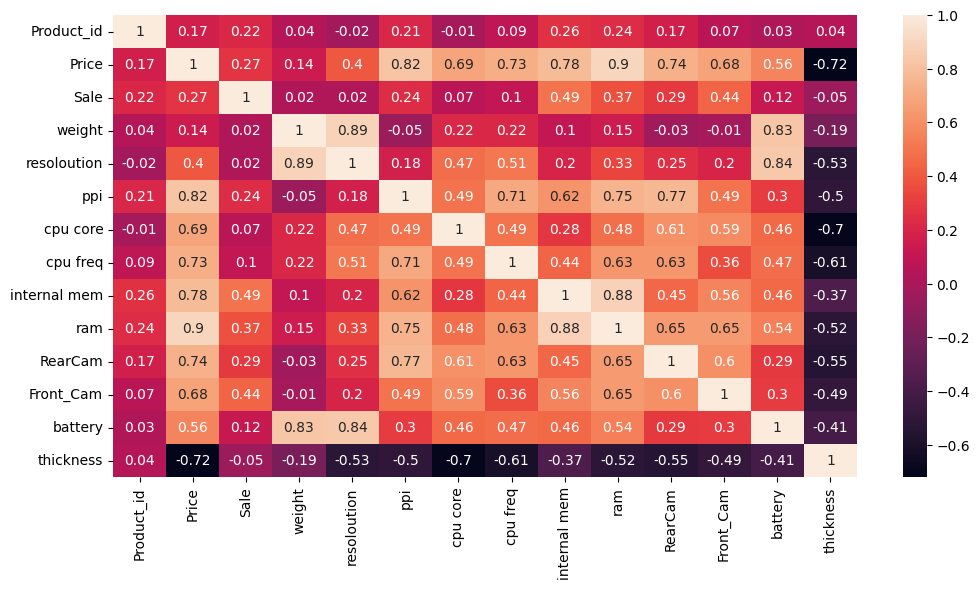

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(correlation_matrix.round(2),annot=True)

In [ ]:
price_correlation = correlation_matrix['Price']

In [ ]:
price_correlation

,Price
Product_id,0.165136
Price,1.000000
Sale,0.273263
weight,0.144555
resoloution,0.404010
ppi,0.817614
cpu core,0.686811
cpu freq,0.727383
internal mem,0.776738
ram,0.896915


In [ ]:
top_features = price_correlation.drop('Price').abs().nlargest(4).index

In [ ]:
top_features

Index(['ram', 'ppi', 'internal mem', 'RearCam'], dtype='object')

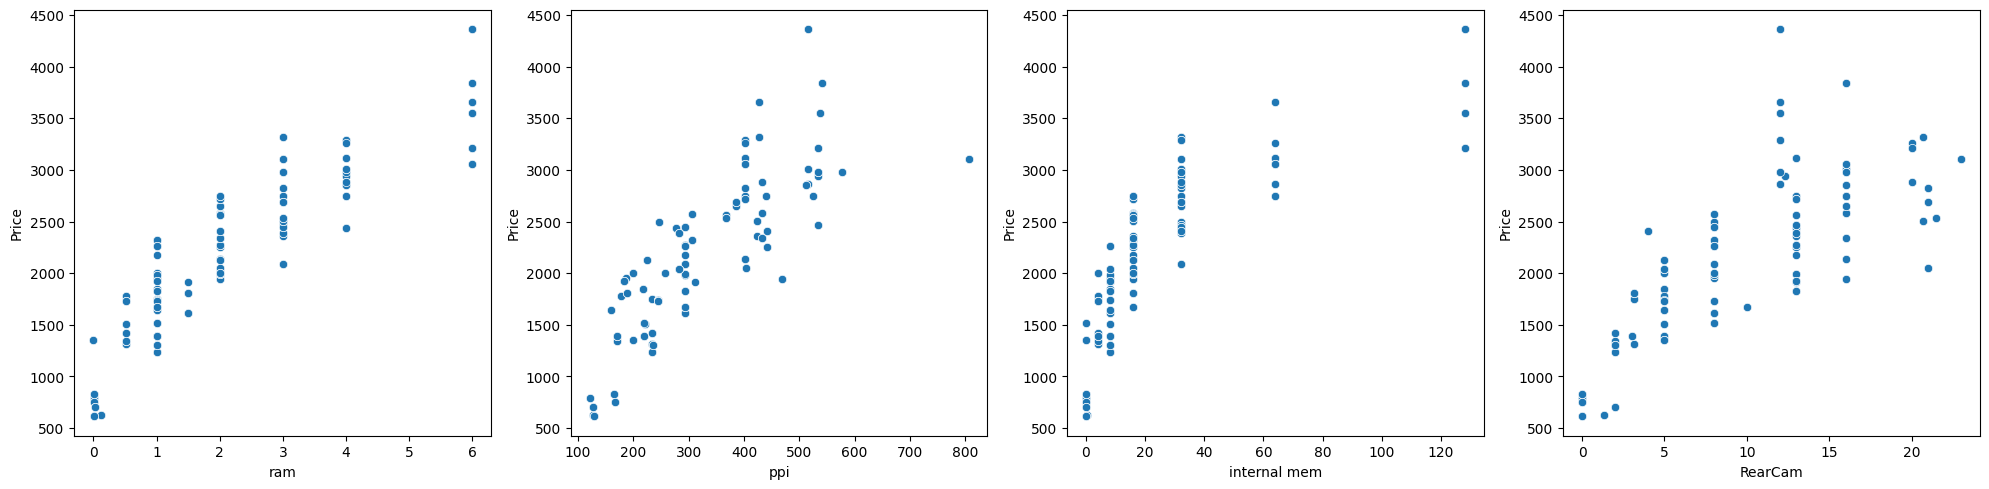

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
for index, feature in enumerate(top_features):
    sns.scatterplot(data=df, x=feature, y='Price', ax=axes[index])
plt.tight_layout()
plt.show()


# Prepare the Data

In [ ]:
X = df[['ram', 'ppi', 'internal mem', 'RearCam']]
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.20,random_state = 23)

## Build and Train the Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Evaluate the Model

In [ ]:
import numpy as np

In [ ]:
y.pred = model.predict(x_test)

### Metrics Calculation

In [ ]:
slope = model.coef_
intercept = model.intercept_
print(f'slope={slope}')
print(f'intercept={intercept}')

slope=[209.77041376   1.09415463   6.05049563  24.34536001]
intercept=1026.3878962295246


### Model Performance Metrics

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [ ]:
print(f'R^2 Score = {r2_score(y_test, y.pred)}')
print(f'Mean Absolute Error = {mean_absolute_error(y_test, y.pred)}')
print(f'Mean Squared Error = {mean_squared_error(y_test, y.pred)}')


R^2 Score = 0.8077968078712959
Mean Absolute Error = 272.1388381265501
Mean Squared Error = 129451.94774113235


### Conclude the Analysis

What insights did you gain from the correlation analysis and scatter plots?

It indicates the positive corelation in scatter plots.

How do the selected features contribute to the prediction of mobile prices?


To finding the selected features for absolute values by using the methods n largest columns

What do the slope coefficient and intercept reveal about the relationship between the features and the target variable?

By importing the linear regression model for y intercept to a best fit line/predict line


How well does the model perform based on the evaluation metrics? Are there any discrepancies between the predicted and actual values?

 The evaluation metrics perform the more positive results in predition  

What might be some potential improvements or additional steps you could take to enhance the model’s performance?

 To select this model, improve some features like mobile colour,gender,sales and add some binary columns 0,1 (yes or no) feature engineering.